In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

sns.set(style="dark")
plt.style.use("ggplot")

### Importing the Data

In [ ]:
games = pd.read_csv('/work/20231129-000846/games.csv')
games_details = pd.read_csv('/work/20231129-000846/games_details.csv')
# players = pd.read_csv('/work/20231129-000846/players.csv')
ranking = pd.read_csv('/work/20231129-000846/ranking.csv')
teams = pd.read_csv('/work/20231129-000846/teams.csv')

/tmp/ipykernel_1056/4040191317.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv('/work/20231129-000846/games_details.csv')


### Cleaning Up the Data Formats and Merging Necessary Tables

In [ ]:
# converting necessary columns from string to respective data types, done to avoid multiple data types in one column

games_details['GAME_ID'] = games_details['GAME_ID'].astype(int)
games_details['PTS'] = games_details['PTS'].astype(float)
games_details['TEAM_ID'] = games_details['TEAM_ID'].astype(int)
games_details['AST'] = games_details['AST'].astype(float)

In [ ]:
games_details_merged = pd.merge(games, games_details, how = "inner", on = "GAME_ID")
games_details_teams_merged = pd.merge(games_details_merged, teams, how = "inner", on = "TEAM_ID")
games_details_teams_merged.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,ABBREVIATION,NICKNAME_y,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,SAS,Spurs,1976,San Antonio,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
1,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,SAS,Spurs,1976,San Antonio,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
2,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,SAS,Spurs,1976,San Antonio,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
3,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,SAS,Spurs,1976,San Antonio,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
4,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,SAS,Spurs,1976,San Antonio,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs


In [ ]:
# dropping unnecessary columns

games_details_teams_merged_cleaned = games_details_teams_merged.drop(columns = 
                                                                     [
                                                                        "YEARFOUNDED",
                                                                        "CITY",
                                                                        "ARENA",
                                                                        "ARENACAPACITY",
                                                                        "OWNER",
                                                                        "GENERALMANAGER",
                                                                        "HEADCOACH",
                                                                        "DLEAGUEAFFILIATION",
                                                                        "LEAGUE_ID", 
                                                                        "MIN_YEAR", 
                                                                        "MAX_YEAR", 
                                                                        "GENERALMANAGER",
                                                                        "GAME_STATUS_TEXT"
                                                                         
                                                                    ],
                                                                     inplace = False
                                                            )
games_details_teams_merged_cleaned

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,ABBREVIATION,NICKNAME_y
0,2022-12-22,22200477,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,...,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0,SAS,Spurs
1,2022-12-22,22200477,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,...,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0,SAS,Spurs
2,2022-12-22,22200477,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,...,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0,SAS,Spurs
3,2022-12-22,22200477,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,...,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0,SAS,Spurs
4,2022-12-22,22200477,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,...,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0,SAS,Spurs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669555,2014-10-06,11400005,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,0.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEN,Nuggets
669556,2014-10-06,11400005,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,0.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEN,Nuggets
669557,2014-10-06,11400005,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,0.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEN,Nuggets
669558,2014-10-06,11400005,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,0.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEN,Nuggets


### Visualization 1: Cumulative Points Per Season by Team (Numerical)

Because we'll be using nonparametric models and GLMs to predict team statistics in future seasons such as the cumulative points scored, we wanted to see how our data looks for each team to choose the best model to fit. This graph displays the seasonal performance of each team based on the number ot total points they've scored. We made this to get a general idea of how a team's performance varies with the basketball season. Looking at this data, we can see there is a lot of non-linearity in each team's performance. Because of this, we want to use a nonparametric model that can capture that non-linearity in our data, and so we decided to use random forest and neural networks for our predictions in points scored by the team in the upcoming season.

In this case, because we only have half of the data from the 2022 season, we'll be using that as our test set and see how our neural networks, random forests, and GLMs perform.

In [ ]:
points_per_season_by_team = games_details_teams_merged_cleaned[["SEASON", "TEAM_ID", "PTS"]].groupby(["SEASON", "TEAM_ID"]).sum().reset_index()
points_per_season_by_team

,SEASON,TEAM_ID,PTS
0,2003,1610612737,7691.0
1,2003,1610612738,8238.0
2,2003,1610612739,7802.0
3,2003,1610612740,8196.0
4,2003,1610612741,7409.0
...,...,...,...
594,2022,1610612762,4501.0
595,2022,1610612763,4016.0
596,2022,1610612764,4042.0
597,2022,1610612765,4173.0


In [ ]:
# droppoing years 2019 and 2020 due to covid, 2022 due to incomplete data, and 2011 due to the nba strike
points_per_season_dropped_years = points_per_season_by_team[(points_per_season_by_team['SEASON'] != 2019) & 
(points_per_season_by_team['SEASON'] != 2020) & 
(points_per_season_by_team['SEASON'] != 2011) &
(points_per_season_by_team['SEASON'] != 2022)]

points_per_season_cleaned =  pd.merge(points_per_season_dropped_years, teams, how = 'inner', on = 'TEAM_ID')[['SEASON', 'TEAM_ID', 'PTS', 'NICKNAME']]
points_per_season_cleaned.head()

,SEASON,TEAM_ID,PTS,NICKNAME
0,2003,1610612737,7691.0,Hawks
1,2004,1610612737,7759.0,Hawks
2,2005,1610612737,8646.0,Hawks
3,2006,1610612737,8460.0,Hawks
4,2007,1610612737,9479.0,Hawks


In [ ]:
DeepnoteChart(points_per_season_cleaned, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"SEASON","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","field":"PTS","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"NICKNAME","scale":{"scheme":"tableau10"}}}},{"mark":{"size":100,"type":"point","opacity":0,"tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"SEASON","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","field":"PTS","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"NICKNAME","scale":{"scheme":"tableau10"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

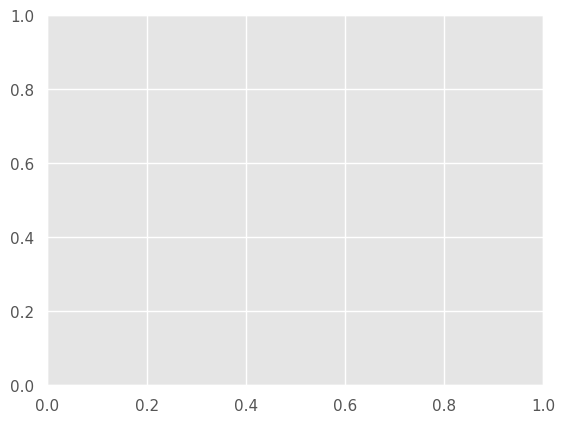

In [ ]:
# code not working in deepnote, unsure why

sns.lineplot(points_per_season_by_team_no_2022_team_name, x = 'SEASON', y = 'PTS', hue = "NICKNAME")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Trends of Total Points Scored Per Team Per Season');

Because of the seasonality in our data and seeing how it fluctuates a lot, we want to see if using the cumulative points scored per season is a good predictor in the performance of teams in future seasons.

Due to the irregularity in the 2011 season due to the NBA strike, we may remove that season from our training data. If we remove said season, this is what the graph looks like:

In [ ]:
points_per_season_by_team_no_2022_2011 = points_per_season_by_team_no_2022_team_name[(points_per_season_by_team_no_2022_team_name['SEASON'] != 2011)]
points_per_season_by_team_no_2022_2011_2019 = points_per_season_by_team_no_2022_team_name[(points_per_season_by_team_no_2022_team_name['SEASON'] != 20119)]

,SEASON,TEAM_ID,PTS,NICKNAME
0,2003,1610612737,7691.0,Hawks
1,2004,1610612737,7759.0,Hawks
2,2005,1610612737,8646.0,Hawks
3,2006,1610612737,8460.0,Hawks
4,2007,1610612737,9479.0,Hawks
...,...,...,...,...
564,2017,1610612766,9382.0,Hornets
565,2018,1610612766,9652.0,Hornets
566,2019,1610612766,7204.0,Hornets
567,2020,1610612766,8814.0,Hornets


In [ ]:
DeepnoteChart(points_per_season_by_team_no_2022_2011, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"SEASON","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","field":"PTS","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"NICKNAME","scale":{"scheme":"tableau10"}}}},{"mark":{"size":100,"type":"point","opacity":0,"tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"SEASON","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","field":"PTS","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"NICKNAME","scale":{"scheme":"tableau10"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

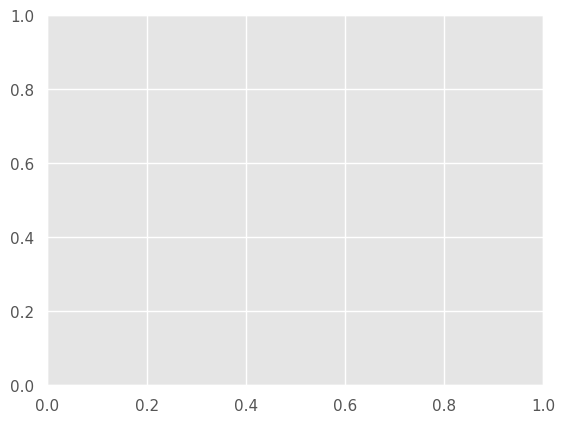

In [ ]:
# code not working on deepnote, unsure why

sns.lineplot(points_per_season_by_team_no_2022_team_name[points_per_season_by_team_no_2022_team_name['SEASON'] != 2011], x = 'SEASON', y = 'PTS', hue = "NICKNAME")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Trends of Total Points Scored Per Team Per Season (2011 Removed)');

### Visualization 2: How Player Position Affects Assists (Categorical)

In [ ]:
games_details_teams_merged_cleaned.loc[games_details_teams_merged_cleaned['AST'].isnull()]

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,ABBREVIATION,NICKNAME_y
13,2022-12-22,22200477,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAS,Spurs
26,2022-12-19,22200455,1610612745,1610612759,2022,1610612745,105.0,0.426,0.645,0.208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAS,Spurs
39,2022-12-17,22200439,1610612759,1610612748,2022,1610612759,101.0,0.429,0.758,0.370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAS,Spurs
63,2022-12-12,22200406,1610612759,1610612739,2022,1610612759,112.0,0.474,0.688,0.333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAS,Spurs
64,2022-12-12,22200406,1610612759,1610612739,2022,1610612759,112.0,0.474,0.688,0.333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAS,Spurs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669555,2014-10-06,11400005,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,0.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEN,Nuggets
669556,2014-10-06,11400005,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,0.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEN,Nuggets
669557,2014-10-06,11400005,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,0.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEN,Nuggets
669558,2014-10-06,11400005,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,0.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEN,Nuggets


Because our second research question is using Bayesian Modeling to predict player performance, we want to explore which variables are significant in terms of contributing to player performance when developing our Bayesian model. Here, we're analyzing if a player's position influences the number of assists they get, on average.

One issue is that for some players, their assist value for games are NaN, which accounts for 16% of the rows in the merged DataFrame:

In [ ]:
sum(games_details_teams_merged_cleaned['AST'].isnull()) / len(games_details_teams_merged_cleaned)

0.16411075930461796

Upon further inspection, this is because these players did not play in those games, whether it be from an injury or a coach's decision or other issues arose. The issues are as follows:

In [ ]:
games_details_teams_merged_cleaned[games_details_teams_merged_cleaned['AST'].isnull()]["COMMENT"].str.extract(r"^(\w+(?:\s\w+)*)\s-")[0].value_counts()

0
DNP               91677
DND               12448
NWT                4609
Did Not Dress       274
Not With Team        58
DNT                   8
Not with team         8
Did Not Travel        8
NOT WITH TEAM         5
Will Not Play         1
OUT                   1
MWT                   1
Did not dress         1
Did not Dress         1
Inactive              1
INJ                   1
Name: count, dtype: int64

Because of this, we ignore these rows in our EDA and focus on individuals with an AST value. We also have to filter out players that did not have a starting position given because this means that they were on the bench for the game.

From here, we group by ```START_POSITION``` and look at the average number of assists per position.

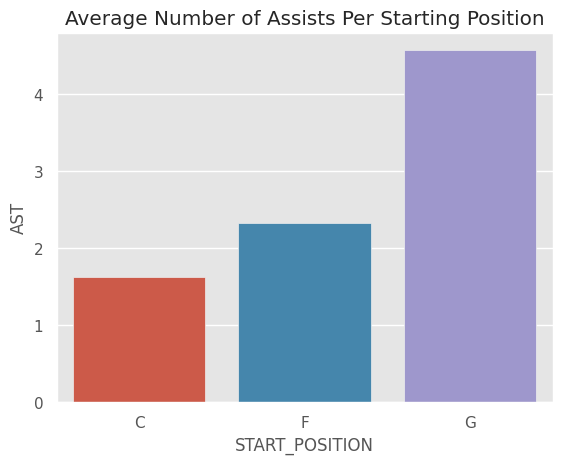

In [ ]:
ast_no_null = games_details_teams_merged_cleaned[games_details_teams_merged_cleaned['AST'].isnull() != True]
ast_position_no_null = ast_no_null[ast_no_null['START_POSITION'].isnull() != True]

grouped_ast_position = ast_position_no_null[['START_POSITION', 'AST']].groupby('START_POSITION').mean().reset_index()

sns.barplot(grouped_ast_position, x = 'START_POSITION', y = 'AST')
plt.title("Average Number of Assists Per Starting Position");

From our barplot, we see that players who were assigned the position of "G" had a higher number of assists shots on average, meaning that "G" players contribute more to the game and the overall team's performance as opposed to other positions.

From this, we can say that a player's position influences how much they contribute in terms of points their team makes and can be used as a relatively decent variable for our Bayesian Models. By this, we mean that a player's position may increase the probability of said player contributing more to the team, which could be used to predict future player's performances as well as the team's performance in the future seasons.

We can also explore how a player's position affects the number of points they score, on average.

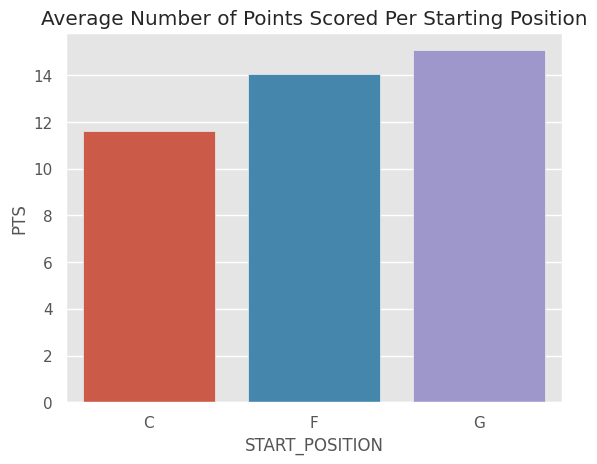

In [ ]:
pts_no_null = games_details_teams_merged_cleaned[games_details_teams_merged_cleaned['PTS'].isnull() != True]
pts_position_no_null = ast_no_null[pts_no_null['START_POSITION'].isnull() != True]

grouped_pts_position = pts_position_no_null[['START_POSITION', 'PTS']].groupby('START_POSITION').mean().reset_index()

sns.barplot(grouped_pts_position, x = 'START_POSITION', y = 'PTS')
plt.title("Average Number of Points Scored Per Starting Position");

While there may not be a big difference, we can see that players who are in the "G" position score on average more points in a game in comparison to other positions.

### Visualization 3: Winning Averages Per Team (Categorical)

Because we're trying to predict team performance in the upcoming season based on previous performances, we wanted to first look and see which team has consistently had high performance marks in the past, and focus on comparing their statistics to other teams.

Looking at our graph, we noticed that the Spurs had the highest percentage of game wins out of the whole NBA. Because of this, we want to look more into the team and player statistics of the Spurs in comparison to the other teams to see why they had such a higher win percentage average.

Also, if we look at the average win % of the teams so far, we can get a general idea on how a team may perform in the upcoming season, which is helpful for answering our research question.

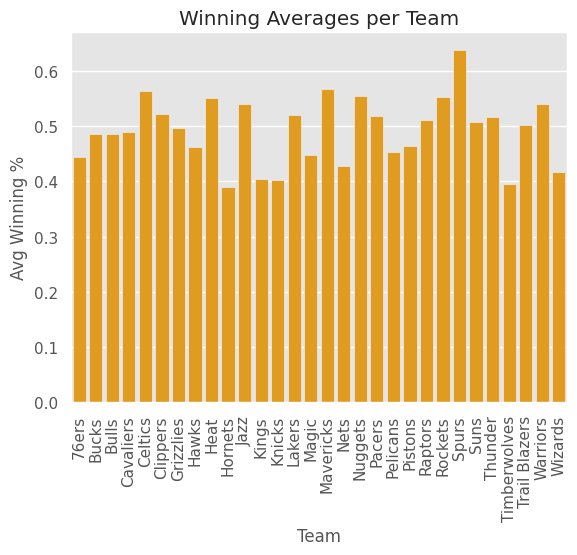

In [ ]:
ranking_teams = pd.merge(ranking, teams, how = 'inner', on = ['TEAM_ID']).drop(columns=['GENERALMANAGER', 'OWNER', 'LEAGUE_ID_y', 'LEAGUE_ID_x'])
ranking_teams

team_avg = pd.DataFrame(ranking_teams.groupby('NICKNAME')['W_PCT'].mean())
team_avg = team_avg.rename_axis('Team')
team_avg.head()

sns.barplot(data = team_avg, x = team_avg.index, y = 'W_PCT', label = 'Avg Win %', color = 'orange')
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Avg Winning %')
plt.title('Winning Averages per Team');

### Visualization 4: Specific Player Performance Compared to General Player Performance (Numerical)

Since were also interested in individual player peformance, we wanted to see how individual player's points scored distribution compared to the overall average points distribution for all players. This would allow us to see which players on average were making more points for their team and vice versa.

When we look at our visualizations, one thing we noticed is that certain players such as Kobe Bryant have a higher point average distribution in comparison to the general player average. Because of this, we believed that looking at player's point distributions would be helpful in predicting a player's performance for the upcoming season.

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
106898,40800405,1610612747,LAL,Los Angeles,977,Kobe Bryant,NaN,G,NaN,43:18,...,0.0,6.0,6.0,5.0,2.0,4.0,1.0,2.0,30.0,14.0
106922,40800404,1610612747,LAL,Los Angeles,977,Kobe Bryant,NaN,G,NaN,48:52,...,1.0,6.0,7.0,8.0,1.0,1.0,3.0,3.0,32.0,11.0
106946,40800403,1610612747,LAL,Los Angeles,977,Kobe Bryant,NaN,G,NaN,40:16,...,1.0,2.0,3.0,8.0,0.0,0.0,4.0,5.0,31.0,-3.0
106982,40800402,1610612747,LAL,Los Angeles,977,Kobe Bryant,NaN,G,NaN,48:30,...,0.0,4.0,4.0,8.0,2.0,0.0,7.0,2.0,29.0,2.0
107006,40800401,1610612747,LAL,Los Angeles,977,Kobe Bryant,NaN,G,NaN,37:58,...,1.0,7.0,8.0,8.0,2.0,2.0,1.0,1.0,40.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666745,11200086,1610612747,LAL,Los Angeles,977,Kobe Bryant,NaN,NaN,NaN,33,...,1.0,4.0,5.0,3.0,1.0,0.0,3.0,3.0,21.0,NaN
666992,11200075,1610612747,LAL,Los Angeles,977,Kobe Bryant,NaN,NaN,NaN,28,...,1.0,5.0,6.0,4.0,1.0,0.0,3.0,0.0,22.0,NaN
667547,11200057,1610612747,LAL,Los Angeles,977,Kobe Bryant,NaN,NaN,NaN,29,...,1.0,4.0,5.0,2.0,1.0,1.0,3.0,2.0,31.0,NaN
667929,11200042,1610612747,LAL,Los Angeles,977,Kobe Bryant,NaN,NaN,NaN,25,...,3.0,5.0,8.0,5.0,2.0,1.0,3.0,2.0,18.0,NaN


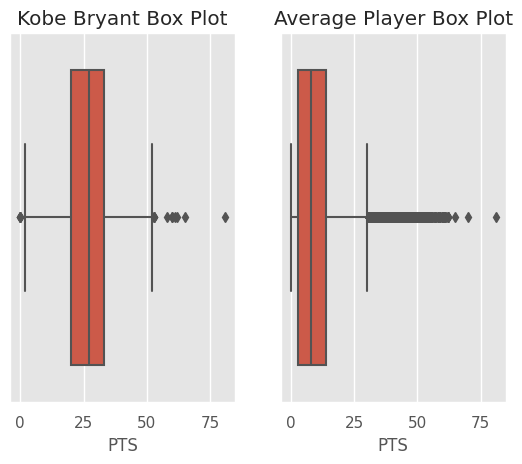

In [ ]:
def create_graph(player_name):
    player_stats = games_details[games_details['PLAYER_NAME'] == player_name]
    display(player_stats)
    plt.subplot(1, 2, 1)
    sns.boxplot(data = player_stats, x = 'PTS')
    plt.title(player_name + ' Box Plot')

    plt.subplot(1, 2, 2)
    sns.boxplot(data = games_details, x = 'PTS')
    plt.title('Average Player Box Plot')

create_graph('Kobe Bryant')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dab229b9-66f6-4eb3-b5aa-92c8de1aae4e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>